In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/3.4/data/haarcascades/haarcascade_frontalface_default.xml

--2022-09-05 02:22:11--  https://raw.githubusercontent.com/opencv/opencv/3.4/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2022-09-05 02:22:12 (19.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


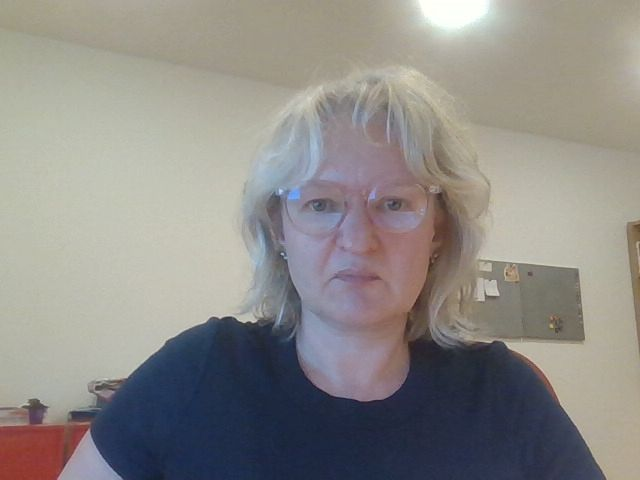

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image = plt.imread('photo.jpg')

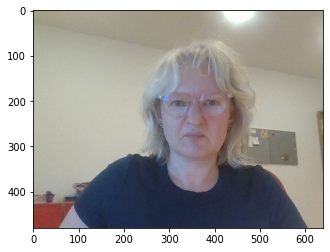

In [ ]:
plt.imshow(image)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

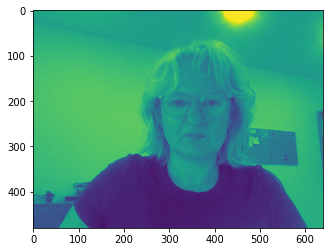

In [ ]:
plt.imshow(gray_image)

In [ ]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
faces = face_detector.detectMultiScale(gray_image, minNeighbors=3)

In [ ]:
faces

array([[267, 139, 180, 180]], dtype=int32)

In [ ]:
x, y, w, h = faces[0]

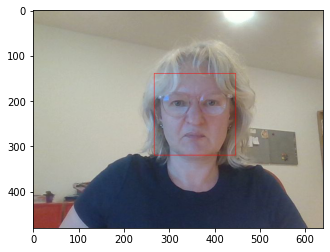

In [ ]:
plt.imshow(cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0)))